### HMMs using Kalman filter in Stan. 

* Code from https://jrnold.github.io/ssmodels-in-stan/the-linear-state-space-model.html

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, numpy.random as npr, pystan as ps, pickle, pandas
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
import scipy

In [2]:
sm = ps.StanModel(file="model.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_98cc597308693583d1573811b784b24f NOW.


In [3]:
def generate_data_linear_gaussian(mu0, Sigma0, A, C, Q, R, n) :
    dim = np.shape(A)[0]
    Y = np.zeros((n,dim))
    X = np.zeros((n,dim))
    X[0] = multivariate_normal.rvs(mean=mu0, cov=Sigma0)
    for t in np.arange(1,n) :
        X[t] = multivariate_normal.rvs(mean=np.matmul(A,X[t-1]), cov=Q)
    for t in range(n) :
        Y[t] = multivariate_normal.rvs(mean=np.matmul(C,X[t]), cov=R)
    return Y, X

In [8]:
A = np.asarray([[0.9, -0.3], 
                [0.2, 1]])
C = np.asarray([[1.1, 0.5],
                [-0.3, -0.8]])
dim = np.shape(A)[0]
sigmax2 = 1
sigmay2 = 5e-1
Q = sigmax2*np.eye(dim)
R = sigmay2*np.eye(dim)
mu0 = np.zeros(dim)
Sigma0 = np.eye(dim)

s = 1

In [9]:
n = 100
Y, X = generate_data_linear_gaussian(mu0, Sigma0, A, C, Q, R, n)
data = dict(n=n, p=dim, m=dim, y=Y, s=s, covariate=np.ones((n,s)), power=1, c=np.zeros(dim))

In [11]:
n_chains = 2

# mle = sm.optimizing(data=data)
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=500)
print(round((time()-start)/60,2), "minutes to run")
trace = fit.extract()

0.81 minutes to run


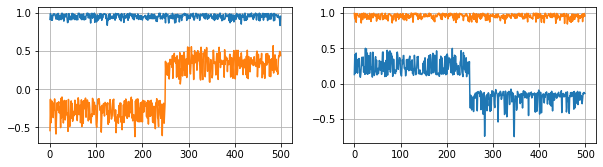

In [12]:
plt.rcParams['figure.figsize'] = (10, 2.5)
for i in range(2) :
    plt.subplot(1,2,i+1)
    plt.plot(trace['T'][:,i])
    plt.grid(True)

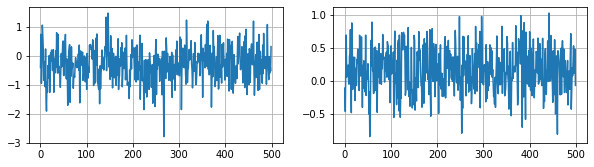

In [13]:
plt.rcParams['figure.figsize'] = (10, 2.5)
for i in range(2) :
    plt.subplot(1,2,i+1)
    plt.plot(trace['B'][:,i])
    plt.grid(True)

In [16]:
np.mean(trace['H'],0)

array([[0.24914833, 0.05290904],
       [0.05290904, 0.36577595]])